## Data Science Workflow

The data science workflow is essentially a seven steps process from ideation to validation. The goal of such practice is to enable data-driven decisions. 

In [1]:
# loading dataset
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
# selecting the estimator
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import k_means

# selecting the metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

Data Representation

X is referred to as the feature matrix and 
y as the labels or target
X is referred to as the feature matrix and 
y as the labels or target


Machine learning is all about creating models from data; and data preprocessing is an important step in the process of creating and evaluating models. The models implemented in Scikit-learn expect the data to be stored in a 2D array or matrix. It can be either be numpy arrays, or in some cases scipy.sparse matrices and the size of the array is expected as [n_samples, n_features]
 


In [2]:
# Import required libraries
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Get data
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error

boston_data = load_boston()
boston_data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [4]:
type(boston_data)

sklearn.utils._bunch.Bunch

In [5]:
# convert sklearn data into numpy ndarray
BS = boston_data.data
type (BS)

numpy.ndarray

In [6]:
# Define feature and target
X = boston_data['data']        # Feature
y = boston_data['target']      # Label

In [7]:
from sklearn.feature_selection import f_regression

In [8]:
f_regression(X,y)

(array([ 89.48611476,  75.2576423 , 153.95488314,  15.97151242,
        112.59148028, 471.84673988,  83.47745922,  33.57957033,
         85.91427767, 141.76135658, 175.10554288,  63.05422911,
        601.61787111]),
 array([1.17398708e-19, 5.71358415e-17, 4.90025998e-31, 7.39062317e-05,
        7.06504159e-24, 2.48722887e-74, 1.56998221e-18, 1.20661173e-08,
        5.46593257e-19, 5.63773363e-29, 1.60950948e-34, 1.31811273e-14,
        5.08110339e-88]))

In [9]:
max(y), min(y)

(50.0, 5.0)

In [10]:
# Print Description
print(boston_data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [11]:
# Subsume into a dataframe
boston = pd.DataFrame(boston_data['data'], columns=boston_data['feature_names'])
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
# Check the dimension
boston.shape

(506, 13)

In [13]:
# Verify missing values on features
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [14]:
# Verify missing values on labels
pd.DataFrame(y).isnull().sum()

0    0
dtype: int64

In [15]:
# Data Exploration - Summary Statistics
boston.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


## Estimator API

Machine learning algorithms and models are referred as estimators. 

There are three different types of estimators 
**transformers**, 
**classifiers** and 
**regressors**.

Following are the basic API structure.

*Choose a class of model

*Choose model hyperparameters

*Arrange the data

*Fit the model

*Apply the model: a) transformers and b) predictors

## Transformers

Transformers are models that process and transform a data set. These transformers are quite useful as rarely the data is in a form where we can feed them directly to a machine learning model. A typical pipeline consists of a pre-processing step that transforms or imputes the data, and a final predictor that predicts target values and the effectiveness of models improve a lot when the features have similar scales. All transformers have the same interface:

Fit(X): train or fit the object to the feature matrix **X**

Transform(X): applies the transformation on **X** using any parameters learned

In [16]:
from sklearn.preprocessing import StandardScaler

# create and fit scaler
scaler = StandardScaler()
scaler.fit(X)

# scale data set
Xt = scaler.transform(X)

# create data frame with results
stats = np.vstack((X.mean(axis=0), X.var(axis=0), Xt.mean(axis=0), Xt.var(axis=0))).T
feature_names = boston_data['feature_names']
columns = ['unscaled mean', 'unscaled variance', 'scaled mean', 'scaled variance']

df = pd.DataFrame(stats, index=feature_names, columns=columns)

In [17]:
df

,unscaled mean,unscaled variance,scaled mean,scaled variance
CRIM,3.613524,73.840360,-8.787437e-17,1.0
ZN,11.363636,542.861840,-6.343191e-16,1.0
INDUS,11.136779,46.971430,-2.682911e-15,1.0
CHAS,0.069170,0.064385,4.701992e-16,1.0
NOX,0.554695,0.013401,2.490322e-15,1.0
RM,6.284634,0.492695,-1.145230e-14,1.0
AGE,68.574901,790.792473,-1.407855e-15,1.0
DIS,3.795043,4.425252,9.210902e-16,1.0
RAD,9.549407,75.666531,5.441409e-16,1.0
TAX,408.237154,28348.623600,-8.868619e-16,1.0


# Predictors

Predictors are models that make predictions and the two main methods are

**Fit(X, y)**: train the object to the feature matrix **X** and label vector **y**.

**Predict(X)**: makes predictions on the passed (new) data set **X**.

In [18]:
# Predictors are models that make predictions and the two main methods are

In [19]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# create model and train/fit
model = LinearRegression()
model.fit(X, y) # training

# predict label values on X
y_pred = model.predict(X) # predicting

print(y_pred[:10])
print(f'R^2: {model.score(X, y):0.6}')

[30.00384338 25.02556238 30.56759672 28.60703649 27.94352423 25.25628446
 23.00180827 19.53598843 11.52363685 18.92026211]
R^2: 0.740643


A more complicated model

In [20]:
from sklearn.ensemble import GradientBoostingRegressor

# creat model and train/fit

model = GradientBoostingRegressor()
model.fit(X,y)

# predict label values on X
y_pred = model.predict(X)

print (y_pred[:10])
print (f'R-Square: {model.score(X,y):0.4}')

[25.90772604 21.96320179 33.92712155 34.14528061 35.41267912 26.7925396
 21.48031031 20.87839556 16.95411564 18.45898255]
R-Square: 0.9761


In [21]:
from sklearn.linear_model import ElasticNet

# create model and train/fit
model1 = ElasticNet()
model1.fit(X, y) # training

# predict label values on X
y_pred = model1.predict(X) # predicting

print(y_pred[:10])

print(f'R^2: {model1.score(X, y):0.6}')

[31.04693629 25.66052703 29.84936431 29.38563254 27.90099681 27.39495128
 24.43295552 19.80196968 11.00985165 20.41398604]
R^2: 0.686102


# Pipelines

**Transformers and estimators can be combined together into a single unifying object: a Pipeline.** The pipeline offers the same API as a regular estimator: it can be fitted and used for prediction with fit and predict.

We can apply the transformations explicitly as above by creating intermediate variables of the transformed data. The other approach is to use Pipelines which can be used to chain multiple estimators into one. Pipelines are made with the Pipeline class which an estimator object that holds a series of transformers with a final estimator. It is built using a list of (key, value) pairs, where key is a string containing the user defined name of the step and value is an estimator object.

In [22]:
# from sklearn.preprocessing import PolynomialFeatures
# poly_features = PolynomialFeatures(degree=2)

Pipeline is sequential, whereas Feature Union is parallel.

In [23]:
from sklearn.pipeline import Pipeline

# list of tuples
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

In [24]:
pipe.named_steps

{'scaler': StandardScaler(), 'regressor': LinearRegression()}

As Pipeline objects are estimators, the standard methods such as fit(X, y), predict(X) and transform(X) applies to it as well. For the above constructed pipeline, when calling pipe.fit(X, y), the following process occurs:

Xt = scaler.fit_transform(X) 
LinearRegression().fit(Xt)
When calling pipe.predict(X, y), the data set X will flow through the transformers and be used to make predictions with the predictor in the last stage.

Xt = scaler.transform(X)
y_pred = LinearRegression().predict(Xt)

When encapsulating the entire workflow through a Pipeline object, we avoid manually calling the fitting, transformations, and predictions steps.

In [25]:
# fit/train model
pipe.fit(X, y)

# predict labels
y_pred = pipe.predict(X)

print(y_pred[:10])
print(f'R^2: {pipe.score(X, y):0.4}')

[30.00384338 25.02556238 30.56759672 28.60703649 27.94352423 25.25628446
 23.00180827 19.53598843 11.52363685 18.92026211]
R^2: 0.7406


Feature Union

In some machine learning workflow, the data may require different transformation processes for certain features. The dataset may contain numerical, categorical, and text data. Each of these types may require different transformations and a convenient way to combine the results of these transformation. This is achieved with FeatureUnion.

While the Pipeline objects arrange estimators in a series, FeatureUnion objects arrange transformers in parallel. A FeatureUnion object combines the output of the each of the transformers in parallel to generate one output matrix. Similar to Pipeline, FeatureUnion is built using a list of (key, value) pairs.

In [26]:
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA
from sklearn.feature_selection import f_regression, SelectKBest

#Pipeline([]) -- is the list of tuples

pca_pipe = Pipeline([('scaler', StandardScaler()), ('dim_red', PCA(n_components=4))])
union = FeatureUnion([('pca_pipe', pca_pipe), ('selector', SelectKBest(f_regression, k=2))])

pipe = Pipeline([('union', union), ('regressor', LinearRegression())]) # predictor is the last step
pipe.fit(X, y)

print(f'Number of features in the original dataset: {X.shape[-1]}')
print(f'Number of features in the new dataset: {union.transform(X).shape[-1]}')
print(f'R-Square: {pipe.score(X, y):0.4}')

Number of features in the original dataset: 13
Number of features in the new dataset: 6
R-Square: 0.6931


## Custom Estimators

Scikit-learn provides dozens of machine learning models and transformers. However, our workflow sometimes requries us to specify the models or transformations. This is achieved with custom estimators.

Scikit-learn has a base class called BaseEstimator that all estimators inherit and these models inherit additional classes such as RegressorMixin, ClassifierMixin, and TransformerMixin. We can customize models by inheriting these classes that are in compliance with scikit-learn so that we can leverage its functionalities such as Pipeline, GridSearchCV classes and such other features.



##Custom Transformer

Transformers are estimators which implement a transform method. Regressors are estimators that implement a predict method while classifiers implement predict method inaddition to the probability output of the predictions using the predict_proba method.

Let's create two features X1, X2 and target variables where y=X1+2∗√X2

In [27]:
# Create features and lable
X1 = np.arange(1,21)
X2 = np.arange(11,31)
y = X1 + 5*np.sqrt(X2)

In [28]:
# Subsume into a dataframe
df = pd.DataFrame({'X1':X1, 'X2':X2, 'y': y}, columns = ['X1', 'X2', 'y'])
df

,X1,X2,y
0,1,11,17.583124
1,2,12,19.320508
2,3,13,21.027756
3,4,14,22.708287
4,5,15,24.364917
5,6,16,26.000000
6,7,17,27.615528
7,8,18,29.213203
8,9,19,30.794495
9,10,20,32.360680


In [29]:
# train-test split in 80:20 ratio
train = df.iloc[:16]
test = df.iloc[16:]

train_X = train.drop('y', axis=1)
train_y = train.y

test_X = test.drop('y', axis=1)
test_y = test.y

In [30]:
from sklearn.metrics import mean_squared_error

In [31]:
# let's see if linear regression is able to predict this properly
m1 = LinearRegression()
fit1 = m1.fit(train_X, train_y)
preds = fit1.predict(test_X)

print(f'{preds}')
print(f'RMSE: {np.sqrt(mean_squared_error(test_y, preds))}')

[43.34617125 44.93599575 46.52582025 48.11564475]
RMSE: 0.5600579894911799


In [32]:
from sklearn.base import BaseEstimator, TransformerMixin

# Build custom transformer
class PythonLabTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, feature):
        self.feature = feature
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        Xt = X.copy()
        Xt[self.feature] = 2 * np.sqrt(Xt[self.feature])
        return Xt

In [33]:
pipe = Pipeline([('pythonlab_trans', PythonLabTransformer('X2')), # user defined
                 ('regressor', LinearRegression())]) # from sklearn

In [34]:
pipe.named_steps

{'pythonlab_trans': PythonLabTransformer(feature='X2'),
 'regressor': LinearRegression()}

In [35]:
pipe.fit(train_X, train_y)
pred = pipe.predict(test_X)

In [36]:
# let's see if linear regression is able to predict this properly
m2 = GradientBoostingRegressor()
fit1 = m2.fit(train_X, train_y)
preds = fit1.predict(test_X)

print(f'{preds}')
print(f'RMSE: {np.sqrt(mean_squared_error(test_y, preds))}')

[41.49464313 41.49464313 41.49464313 41.49464313]
RMSE: 4.0414138856526405


In [37]:
from sklearn.base import BaseEstimator, TransformerMixin

# Build custom transformer
class PythonLabTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, feature):
        self.feature = feature
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        Xt = X.copy()
        Xt[self.feature] = 2 * np.sqrt(Xt[self.feature])
        return Xt

In [38]:
pipe = Pipeline([('pythonlab_trans', PythonLabTransformer('X2')), # user defined
                 ('regressor', LinearRegression())]) # from sklearn

In [39]:
pipe.named_steps

{'pythonlab_trans': PythonLabTransformer(feature='X2'),
 'regressor': LinearRegression()}

In [40]:
pipe.fit(train_X, train_y)
pred = pipe.predict(test_X)

In [41]:
print(f'{pred}')
print(f'RMSE: {np.sqrt(mean_squared_error(test_y, pred))}')

[42.98076211 44.45751311 45.92582404 47.38612788]
RMSE: 1.2306961192854808e-14


## Custom Regressor

We'll now construct a custom regressor that predicts the mean label value of training dataset.

In [42]:
from sklearn.base import RegressorMixin

# Build regressor
class PythonLabRegressor(BaseEstimator, RegressorMixin):
    def __int__(self):
        pass
    
    def fit(self, X, y):
        self.y_mean = np.mean(y)
        return self
    
    def predict(self, X):
        return self.y_mean * np.ones(X.shape[0])

In [43]:
pipe = Pipeline([('pythonlab_trans', PythonLabTransformer('X2')),
                 ('pythonlab_regressor', PythonLabRegressor())])

In [44]:
pipe.named_steps

{'pythonlab_trans': PythonLabTransformer(feature='X2'),
 'pythonlab_regressor': PythonLabRegressor()}

In [45]:
pipe.fit(train_X, train_y)
pred = pipe.predict(test_X)

In [46]:
print(f'{pred}')
print(f"R^2: {pipe.score(train_X, train_y)}")   # score method inherited from base class

[29.832663 29.832663 29.832663 29.832663]
R^2: 0.0


References

Scikit-learn Documentation

Scikit-learn API Reference

Python Resources

Jake VanderPlas (2017), Python Data Science Handbook

https://jakevdp.github.io/PythonDataScienceHandbook/

# Introduction to ML using Scikit-learn - II

The workflow

We'll employ the following linear regressor from scikit-learn for median home price prediction.

Linear Regression

Lasso Regression

Ridge Regression

Elastic Net Regression

Steps	Workflow	Remarks

Step 1	Ideation	Predict the median home price from the Boston housing dataset

Step 2	Data Collection	Load the Boston housing dataset from scikit-learn

Step 3	Exploratory Data Analysis	Study summary statistics

Step 4	Cleaning Dataset	Data already cleaned, no further imputation required

Step 5	Transformation	Perform feature scaling using StandardScaler

Step 6	Modeling	Building and training linear regressor

Step 7	Metrics	Validating the model performance using score method

## Step 1 Problem definition

To predict the meadian home price from the Boston Housing

## Step 2 Data Collection

In [47]:

# Import Libraries

import numpy as np
import pandas as pd

# Visualizaiton
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Get Dataset from Scikit-learn
from sklearn.datasets import load_boston

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Regressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

# Metrics
from sklearn.metrics import mean_squared_error

In [48]:
# Load data
boston_data = load_boston()

In [49]:
# Subsume into a dataframe
boston = pd.DataFrame(boston_data['data'], columns=boston_data['feature_names'])
# Add target to the dataframe
boston['MEDV'] = boston_data.target

boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [51]:
## Exploratory Data Analysis
# pd.set_option('precision', 4)
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


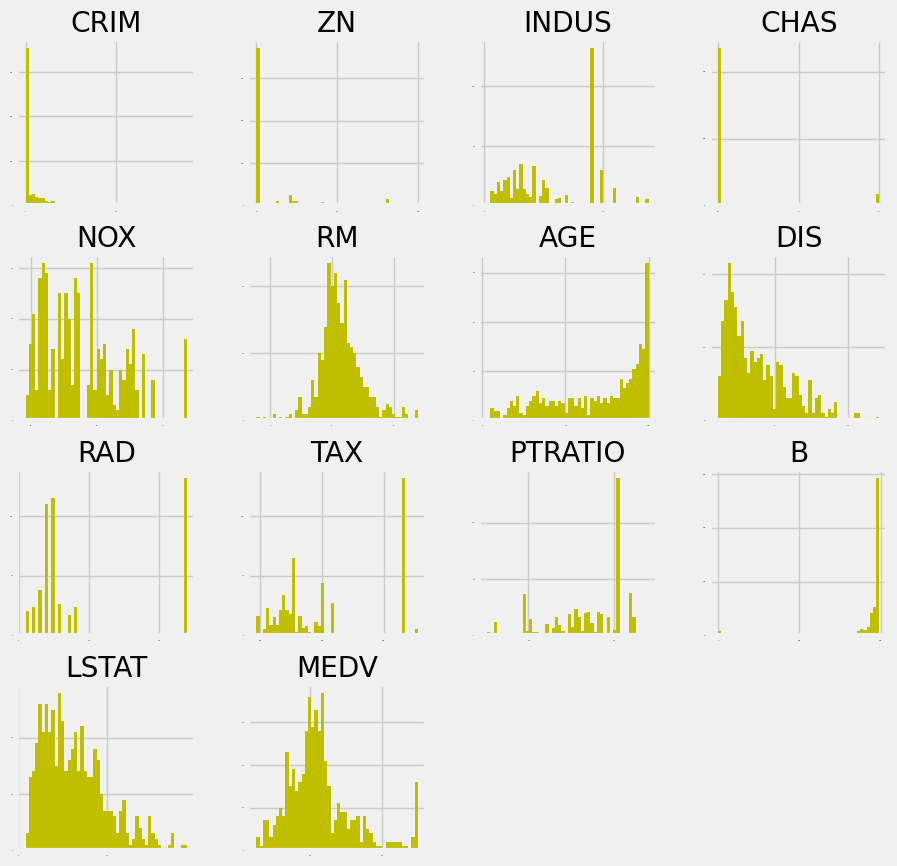

In [52]:
from matplotlib import pyplot
boston.hist(bins=50, sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(10,10), color = 'y')
pyplot.show()

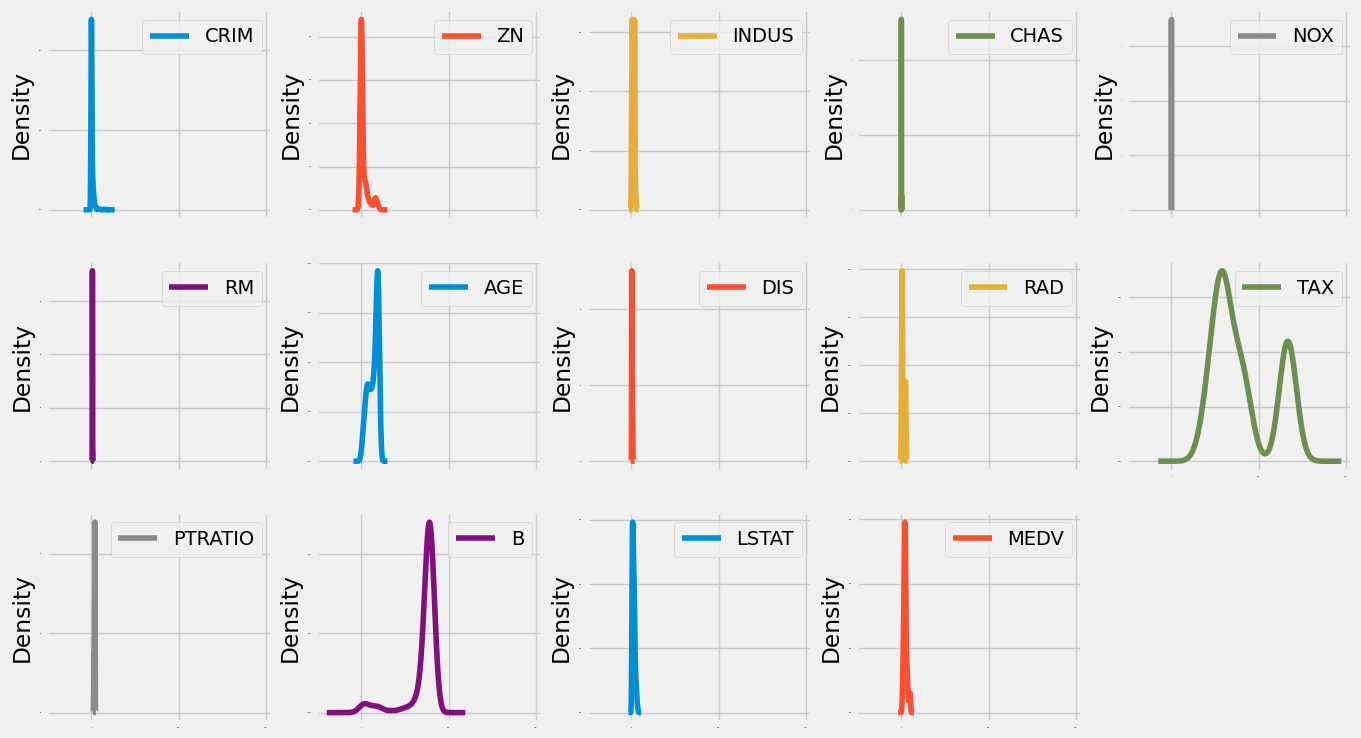

In [53]:
boston.plot(kind='density', subplots=True, layout=(5,5), sharex=True, legend=True, fontsize=1, figsize=(15,15))
pyplot.show()

<AxesSubplot: title={'center': 'Correlation Matrix'}>

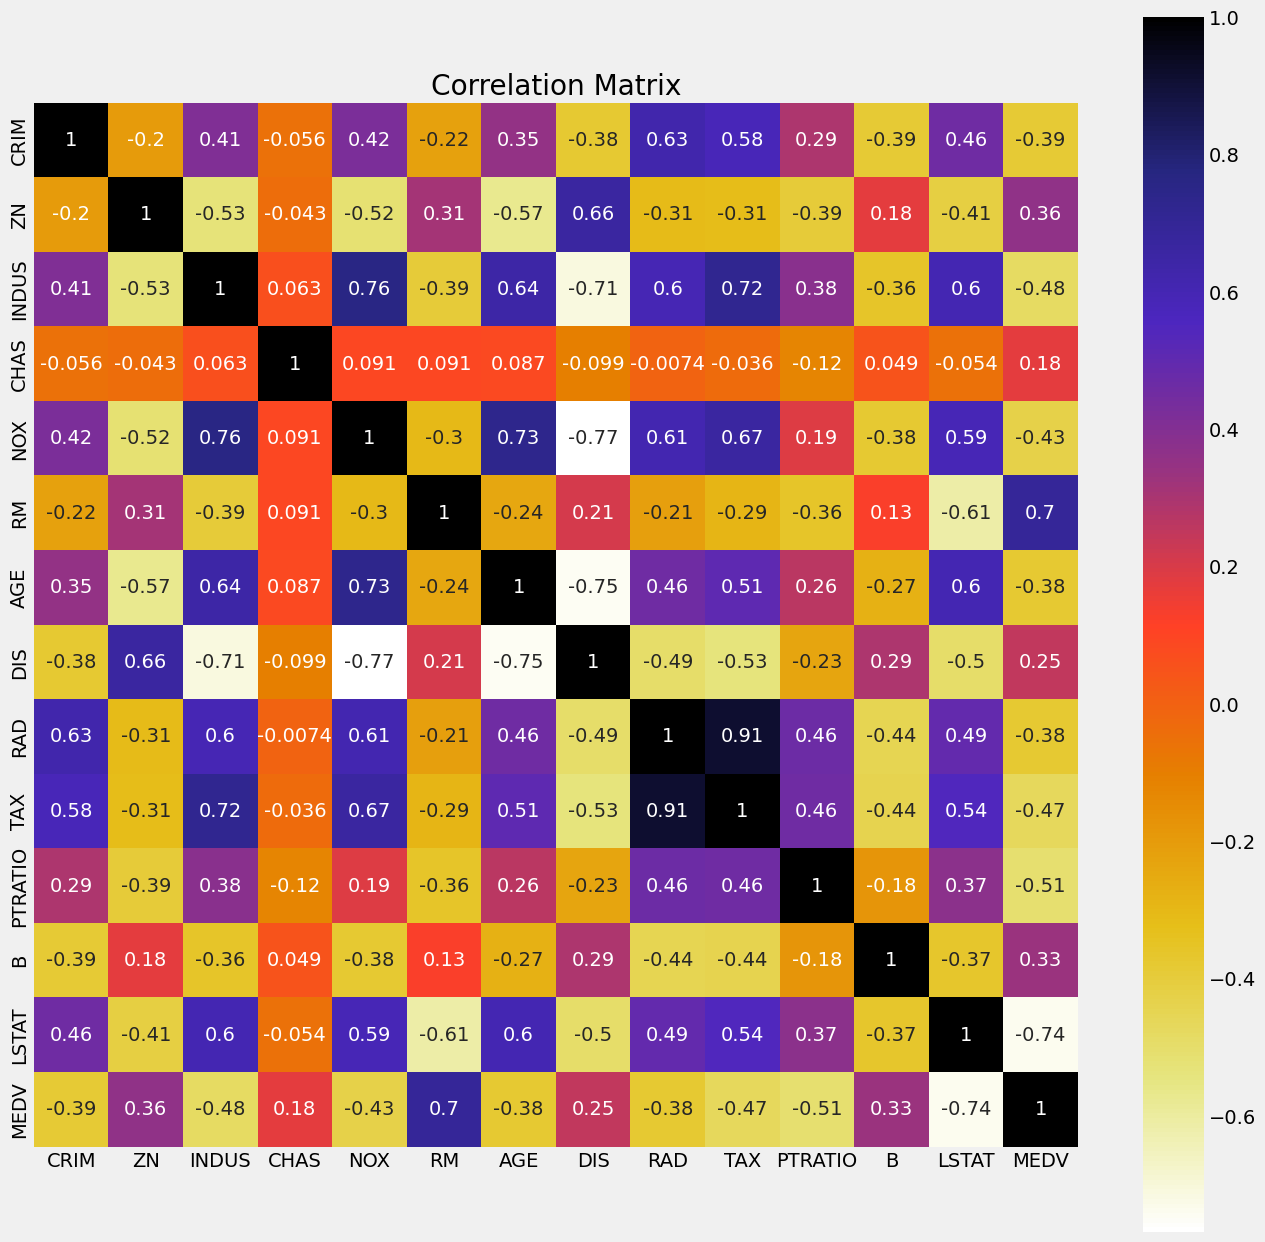

In [54]:
# Interaction between different variables
import seaborn as sns
correlation = boston.corr()
pyplot.figure(figsize=(15,15))
pyplot.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='CMRmap_r')

<Figure size 1500x1500 with 0 Axes>

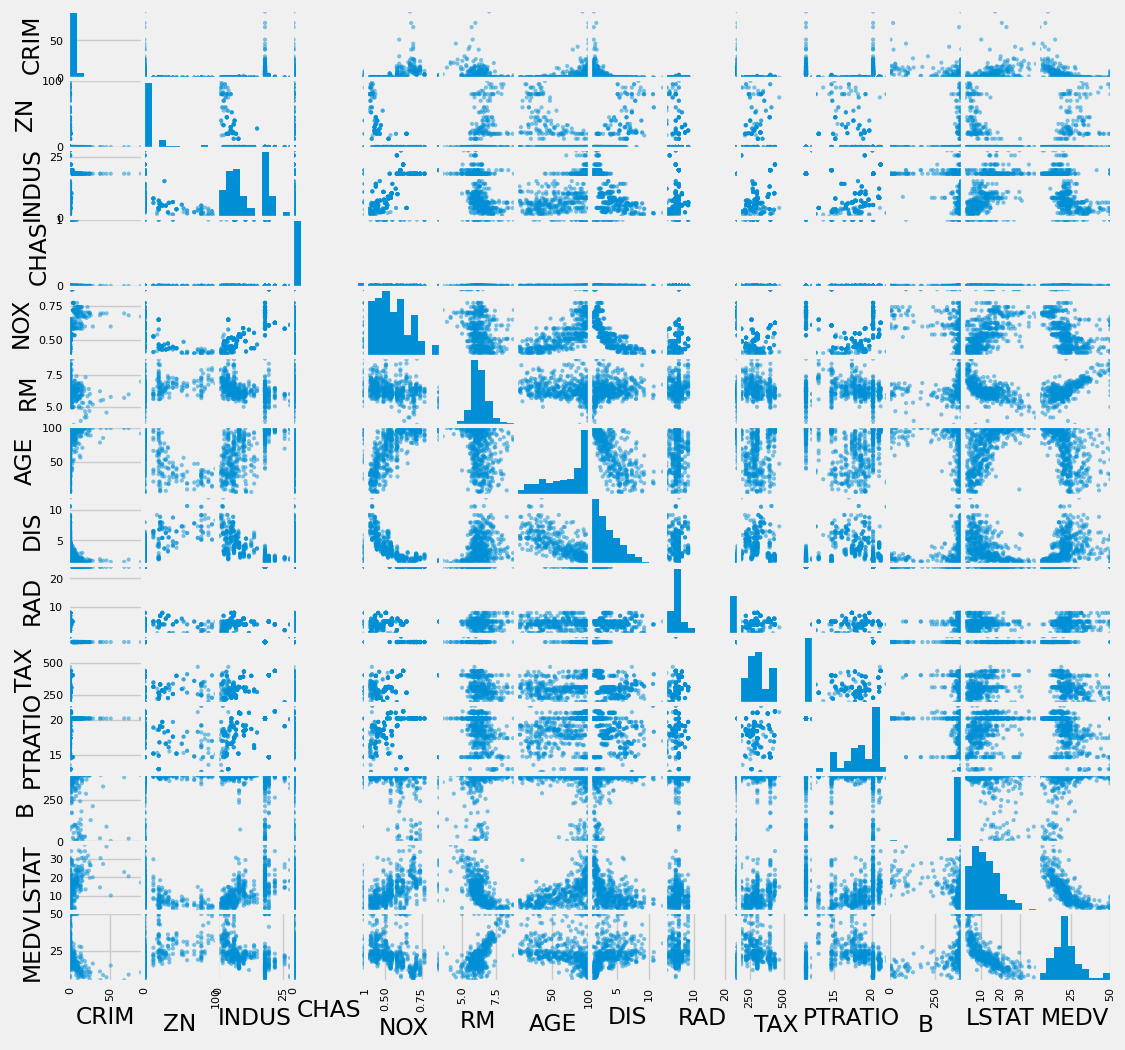

In [55]:
from pandas.plotting import scatter_matrix
from statsmodels.graphics.tsaplots import plot_acf
pyplot.figure(figsize=(15,15))
scatter_matrix(boston,figsize=(12,12))
pyplot.show()

In [56]:
# Define feature and target
X = boston.drop('MEDV', axis=1)      # Feature
y = boston['MEDV']                   # Label

In [57]:
# Splitting the datasets into training and testing data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output the train and test data size
print(f"Train and Test Size {len(X_train)}, {len(X_test)}")

Train and Test Size 404, 102


In [58]:
scaler = StandardScaler()
xs = scaler.fit_transform(X)

In [59]:
xs.shape

(506, 13)

In [60]:
X_train.shape

(404, 13)

In [61]:
X_train.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47
332,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
423,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28


## Linear Regression

In linear regression, the model coefficients are selected by minimizing a loss function.

In [62]:
pipe = Pipeline([('scaler', StandardScaler()),('regressor', LinearRegression())])

In [63]:
# fit/train model
pipe.fit(X_train, y_train)

# predict labels
y_pred = pipe.predict(X_test)

# metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'MSE: {mse:0.4}')
print(f'RMSE: {rmse:0.4}')
print(f'R2 Train: {pipe.score(X_train, y_train):0.4}')
print(f'R2 Test: {pipe.score(X_test, y_test):0.4}')

MSE: 24.29
RMSE: 4.929
R2 Train: 0.7509
R2 Test: 0.6688


In [64]:
y_pred.mean()

21.25240910876817

In [65]:
pipe['regressor'].coef_

array([-1.00213533,  0.69626862,  0.27806485,  0.7187384 , -2.0223194 ,
        3.14523956, -0.17604788, -3.0819076 ,  2.25140666, -1.76701378,
       -2.03775151,  1.12956831, -3.61165842])

In [66]:
pipe['regressor'].intercept_

22.796534653465375

## Regularized Regression

If the coeficients are too large in linear regression, it can lead to overfitting the model. We do regularization to over come such issues that penalises large coefficients. Lasso and Ridge regression are penalty regression that prevent over-fitting from the simple linear regression.


## LASSO

The Least Absolute Shrinkage and Selection Operator (LASSO) is a variation of linear regression. In Lasso, the loss function is minimized by limiting the sum of absolute values of the model coefficients where the L1 penalty term is added to the Mean Square Error (MSE). The L1 penalty term not only shrinks the coefficents, but shrinks some of them to zero and that is very useful for feature selection. 

In [67]:
l1 = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', Lasso(alpha=0.1))
])

In [68]:
# fit lasso model
l1.fit(X_train, y_train)
print(f'R^2 Train: {l1.score(X_train, y_train):0.4}')
print(f'R^2 Test: {l1.score(X_test, y_test):0.4}')

R^2 Train: 0.745
R^2 Test: 0.6501


In [69]:
l1['regressor'].coef_

array([-0.71836455,  0.25962714, -0.        ,  0.69822096, -1.56814243,
        3.27150693, -0.        , -2.28444944,  0.67193802, -0.3566537 ,
       -1.89333519,  1.03136581, -3.60941047])

In [70]:
alpha_range = np.linspace(0.01,1,50)
# alpha_range = 10**np.linspace(2,-2,100)*0.5
score = []
la_mse = []
la_rmse = []
la_coef = []

for i in alpha_range:
    l1 = Pipeline([('scaler', StandardScaler()), ('regressor', Lasso(alpha=i))])
    #l1 = Pipeline([('scaler', StandardScaler()), ('regressor', LogisticRegression(penalty = 'l1', solver = 'liblinear', C=i))])
    l1.fit(X, y)
    mse = mean_squared_error(y_test, l1.predict(X_test))
    rmse = np.sqrt(mse)
    
    la_mse.append(mse)
    la_rmse.append(rmse)
    la_coef.append(l1['regressor'].coef_)
    score.append(l1.score(X_test, y_test))

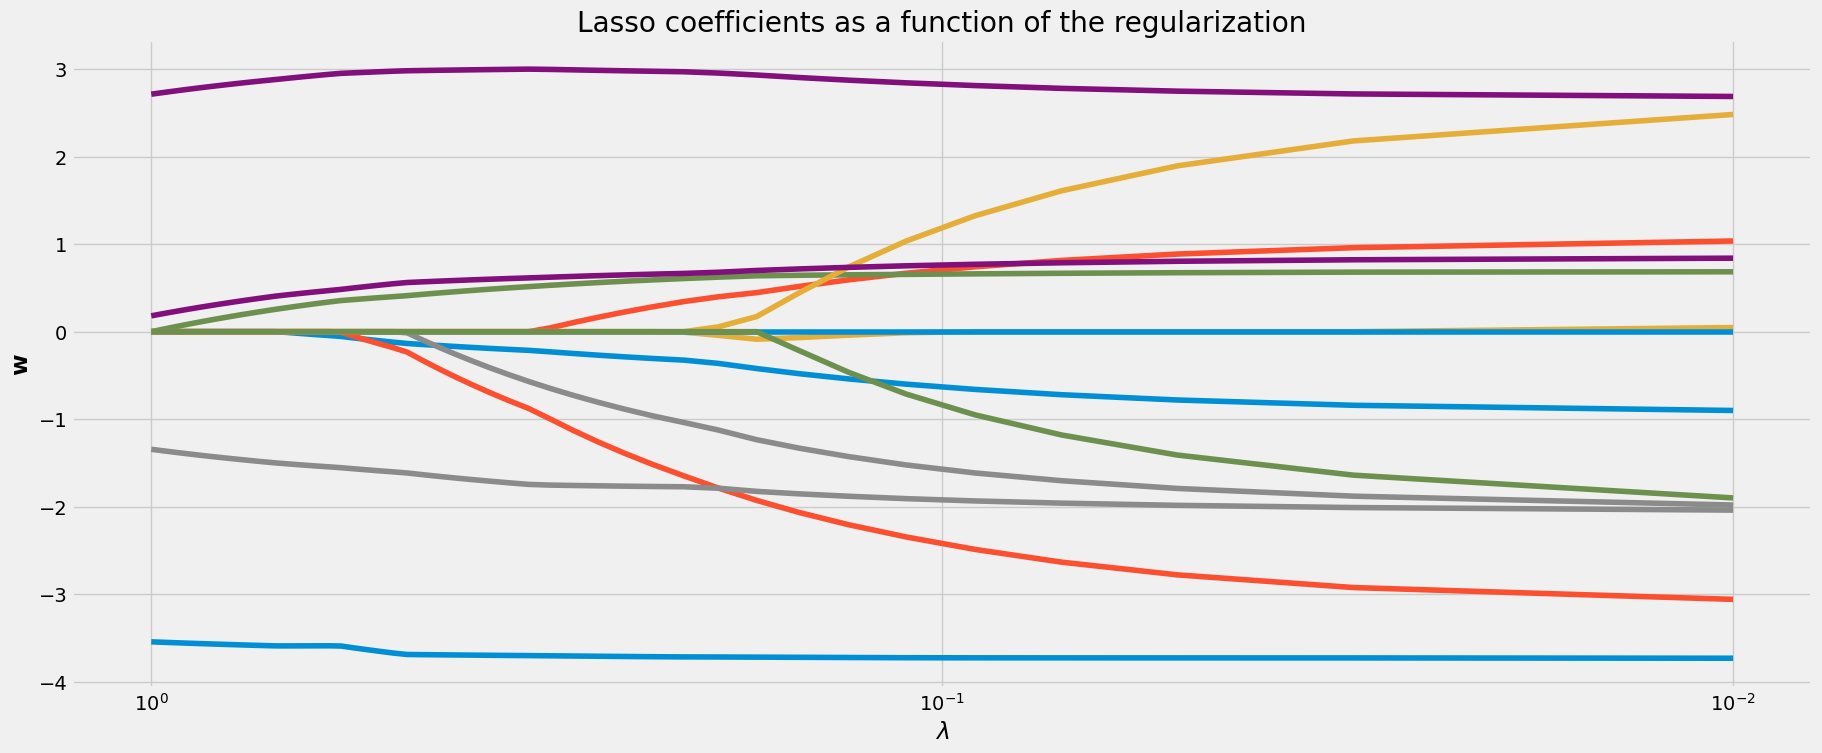

In [71]:
# Plot Coefficients
fig = plt.figure(figsize=(20,8))
ax = plt.axes()
ax.plot(alpha_range, la_coef)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
ax.set_title('Lasso coefficients as a function of the regularization')
ax.set_xlabel('$\lambda$')
ax.set_ylabel('$\mathbf{w}$');

In [72]:
import plotly.express as px
import cufflinks
import plotly
import plotly.graph_objects as go
fig = px.line(la_coef)
fig.show()

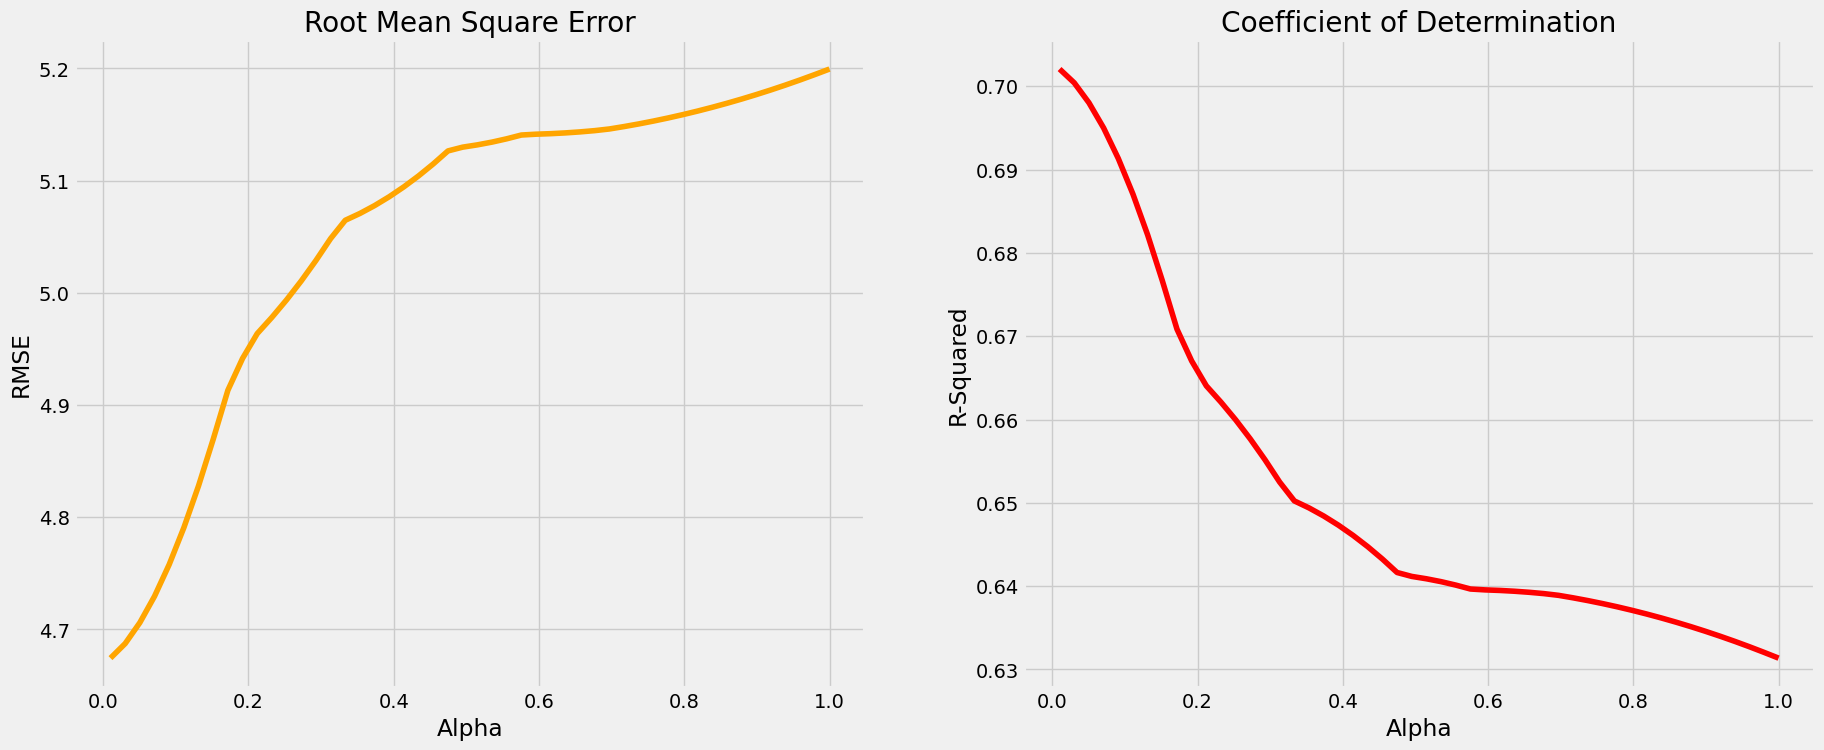

In [73]:
# Plot RMSE
fig, ax = plt.subplots(1,2, figsize=(20,8))
ax[0].plot(alpha_range, la_rmse, 'orange')
ax[0].set_title('Root Mean Square Error')
ax[0].set_xlabel('Alpha')
ax[0].set_ylabel('RMSE')

# Plot R^2
ax[1].plot(alpha_range, score, 'r-')
ax[1].set_title('Coefficient of Determination')
ax[1].set_xlabel('Alpha')
ax[1].set_ylabel('R-Squared');

Text(0, 0.5, 'RMSE')

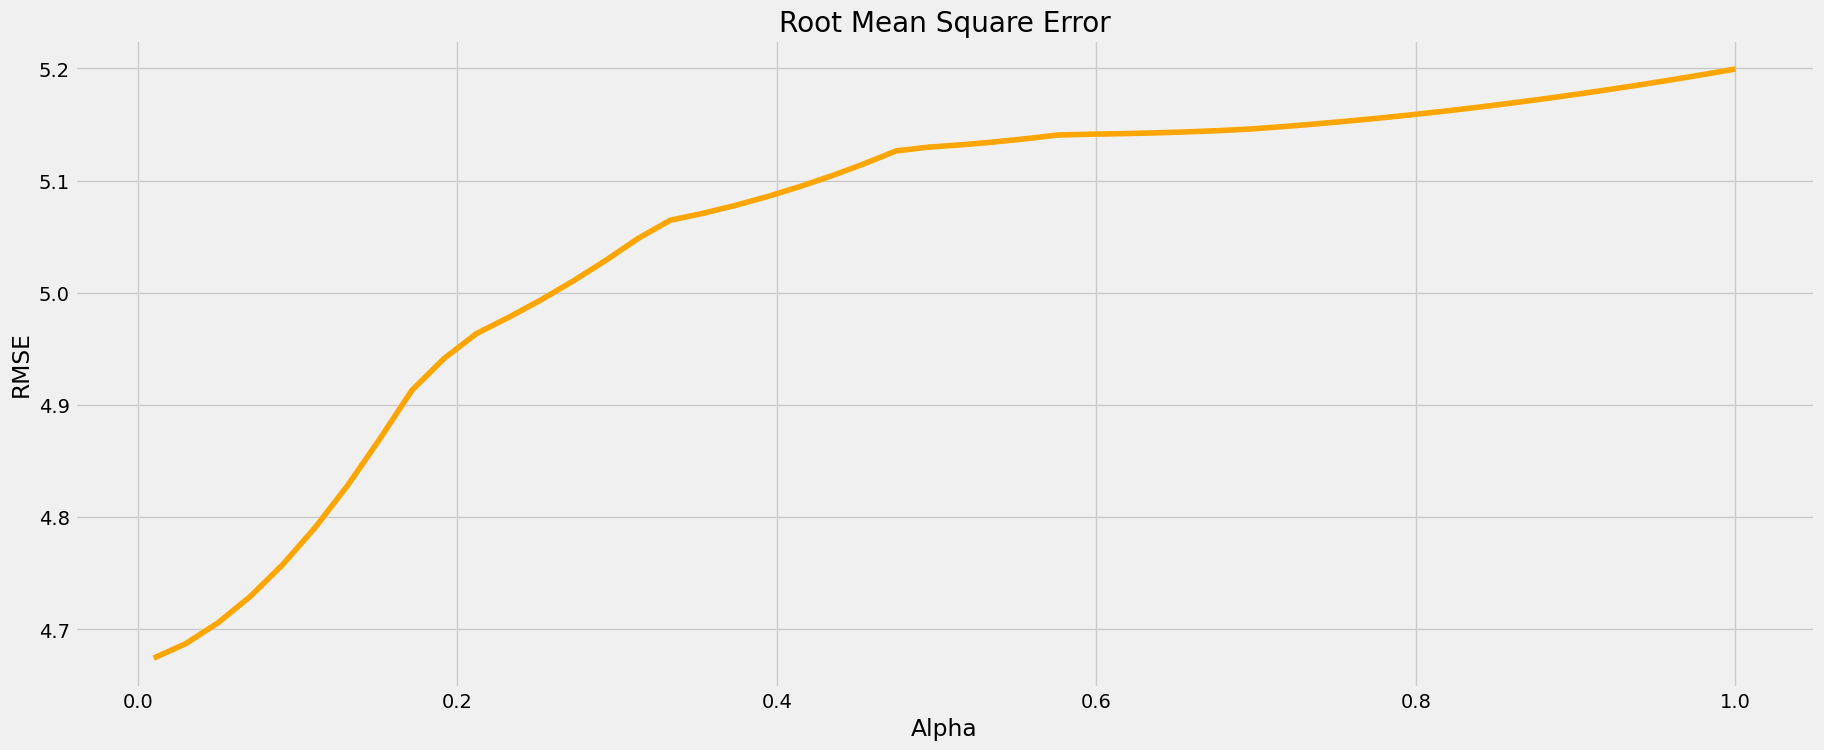

In [74]:
# Plot RMSE

fig = plt.figure(figsize=(20,8))
ax = plt.axes()

ax.plot(alpha_range, la_rmse, 'orange')
ax.set_title('Root Mean Square Error')
ax.set_xlabel('Alpha')
ax.set_ylabel('RMSE')


In [75]:
fig = go.Figure(data=go.Scatter(x=1/alpha_range, y=la_rmse))
fig.show()

## Ridge

In ridge regression, the cost function is altered by adding a L2 penality equivalent to square of the magnitude of the coefficients. The Ridge regression shrinks the coefficients and helps to reduce the multi-collinearity. As seen from the above graph, when  λ→0 λ →0
, the cost function becomes similar to the linear regression cost function.

In [76]:
rid = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', Ridge(alpha=1))
])

In [77]:
# fit ridge model
rid.fit(X, y)
print(f'R^2 Train: {rid.score(X_train, y_train):0.4}')
print(f'R^2 Test: {rid.score(X_test, y_test):0.4}')

R^2 Train: 0.7478
R^2 Test: 0.7023


In [78]:
rid['regressor'].coef_

array([-0.91987132,  1.06646104,  0.11738487,  0.68512693, -2.02901013,
        2.68275376,  0.01315848, -3.07733968,  2.59153764, -2.0105579 ,
       -2.05238455,  0.84884839, -3.73066646])

In [79]:
# alpha_range = np.arange(1,2000,100)
alpha_range = 10**np.linspace(6,-2,100)*0.5
score = []
rid_mse = []
rid_rmse = []
rid_coef = []

for i in alpha_range:
    rid = Pipeline([('scaler', StandardScaler()), ('regressor', Ridge(alpha=i))])
    rid.fit(X, y)
    mse = mean_squared_error(y_test, rid.predict(X_test))
    rmse = np.sqrt(mse)
    
    rid_mse.append(mse)
    rid_rmse.append(rmse)
    rid_coef.append(rid['regressor'].coef_)
    score.append(rid.score(X_test, y_test))

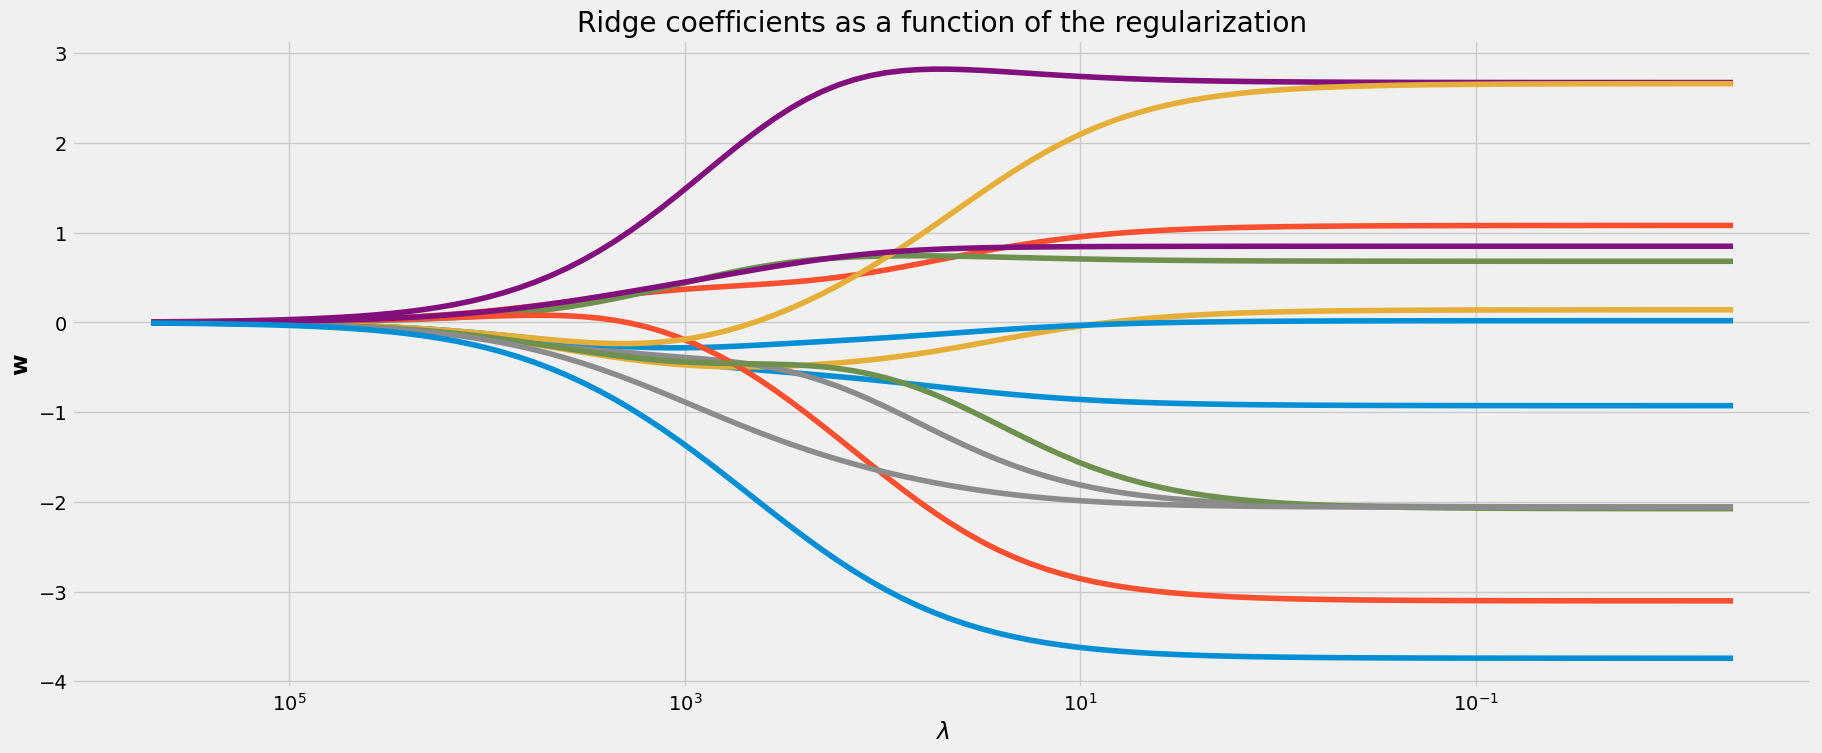

In [80]:
# Plot Coefficients
fig = plt.figure(figsize=(20,8))
ax = plt.axes()
ax.plot(alpha_range, rid_coef)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
ax.set_title('Ridge coefficients as a function of the regularization')
ax.set_xlabel('$\lambda$')
ax.set_ylabel('$\mathbf{w}$');

In [81]:
fig = px.line(rid_coef,title= 'Ridge coefficients as a function of the regularization')
fig.show()

In [82]:
fig = px.line( x=alpha_range, y=rid_rmse,)
fig.update_layout(title='Coefficient of Determination',
                   xaxis_title='lambda - penalty strenth',
                   yaxis_title='R Square')
fig.show()

In [83]:
fig = px.line( x=alpha_range, y=score,)
fig.update_layout(title='Coefficient of Determination',
                   xaxis_title='lambda - penalty strenth',
                   yaxis_title='R Square')
fig.show()

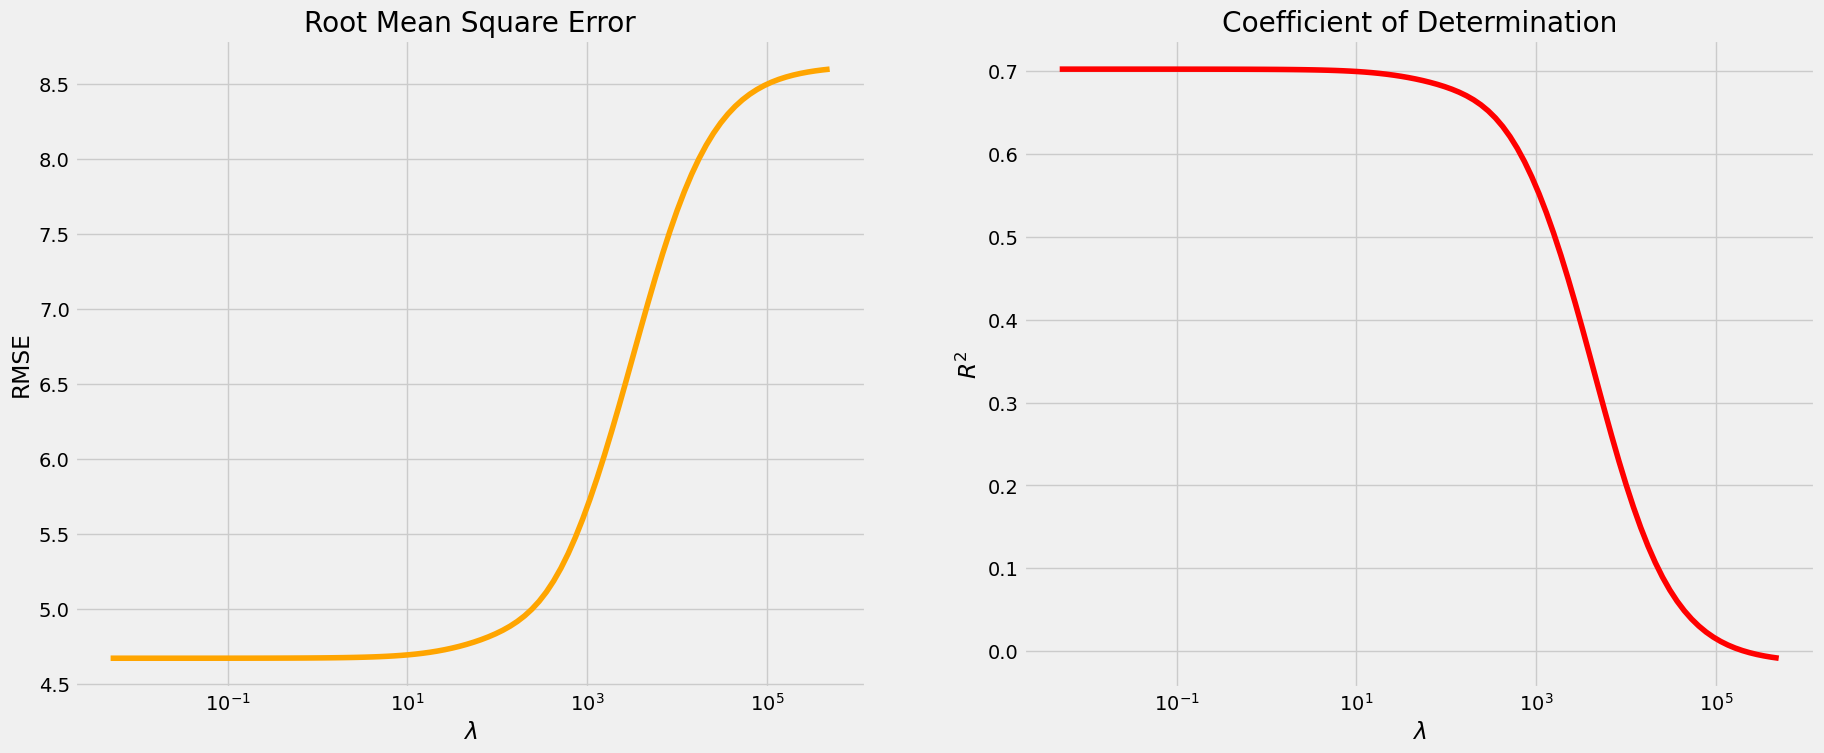

In [84]:
# Plot RMSE
fig, ax = plt.subplots(1,2, figsize=(20,8))
ax[0].plot(alpha_range, rid_rmse, 'orange')
ax[0].set_title('Root Mean Square Error')
ax[0].set_xlabel('$\lambda$')
ax[0].set_ylabel('RMSE')
ax[0].set_xscale('log')

# Plot R^2
ax[1].plot(alpha_range, score, 'r-')
ax[1].set_title('Coefficient of Determination')
ax[1].set_xlabel('$\lambda$')
ax[1].set_ylabel('$R^2$')
ax[1].set_xscale('log');

## ElasticNet Regression

ElasticNet combines the properties of both Lasso and Ridge regression. It penalizes the model using both the L1 and L2 norm. 



In [85]:
elastic = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', ElasticNet(alpha=0.1, l1_ratio=0.5))
])

In [86]:
# fit elasticnet model
elastic.fit(X_train, y_train)
print(f'R^2 Train: {elastic.score(X_train, y_train):0.4}')
print(f'R^2 Test: {elastic.score(X_test, y_test):0.4}')

R^2 Train: 0.7447
R^2 Test: 0.6563


In [87]:
elastic ['regressor'].coef_

array([-0.76122098,  0.32222666, -0.03100814,  0.73691319, -1.39595306,
        3.23360553, -0.09611142, -2.17591861,  0.84653681, -0.62395172,
       -1.83004132,  1.04033648, -3.4038305 ])

In [88]:
# alpha_range = np.linspace(0.01,15,150)
alpha_range = 10**np.linspace(2,-2,100)*0.5
score = []
elastic_mse = []
elastic_rmse = []
elastic_coef = []

for i in alpha_range:
    elastic = Pipeline([('scaler', StandardScaler()), ('regressor', ElasticNet(alpha=i))])
    elastic.fit(X, y)
    mse = mean_squared_error(y_test, elastic.predict(X_test))
    rmse = np.sqrt(mse)
    
    elastic_mse.append(mse)
    elastic_rmse.append(rmse)
    elastic_coef.append(elastic['regressor'].coef_)
    score.append(elastic.score(X_test, y_test))

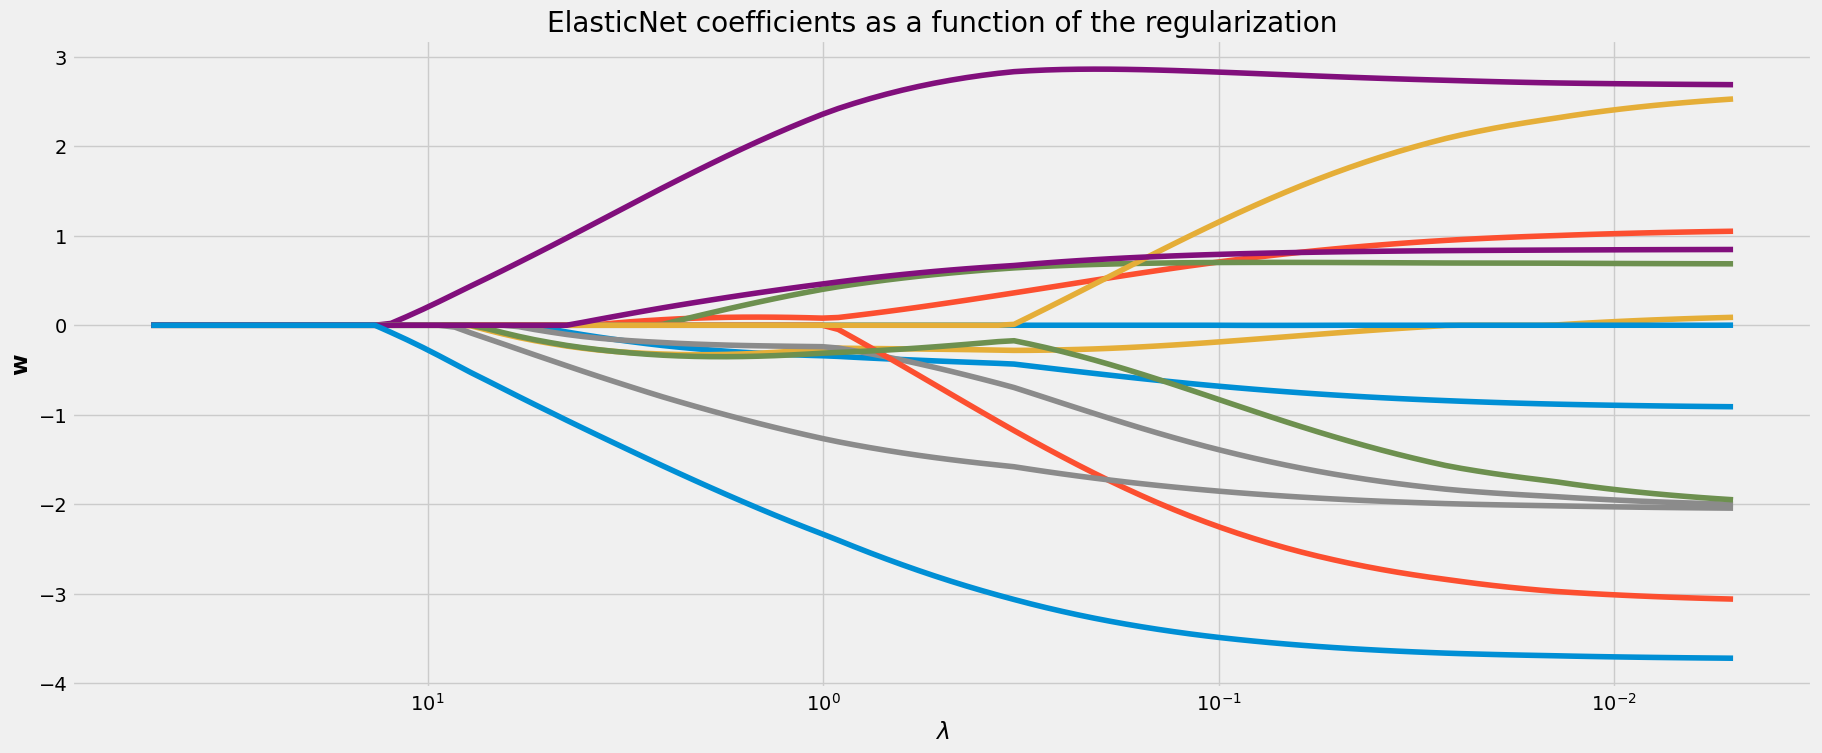

In [89]:
# Plot Coefficients
fig = plt.figure(figsize=(20,8))
ax = plt.axes()
ax.plot(alpha_range, elastic_coef)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
ax.set_title('ElasticNet coefficients as a function of the regularization')
ax.set_xlabel('$\lambda$')
ax.set_ylabel('$\mathbf{w}$');

## Features Selection

Feature selection methods are approaches to reduce the number of input variables that are believed to be most useful to a model. It is primarily focused on removing non-informative or redundant predictors from the model. We'll focus on few methods in relation to linear regression.

## Method 1: VIF

Multicollinearity occurs when two or more independent variables are highly correlated with one another in a regression model. This means that an independent variable can be predicted from another independent variable in a regression model.

Multicollinearity can be detected using various methods and one such method is Variable Inflation Factors (VIF). VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable.

VIF score of an independent variable represents how well the variable is explained by other independent variables.

R^2 value is determined to find out how well an independent variable is described by the other independent variables. A high value of R^2 means that the variable is highly correlated with the other variables. This is captured by the VIF which is denoted below:

VIF = 1/(1-R^2)


VIF starts at 1 and has no upper limit

VIF = 1, no correlation between the independent variable and the other variables

VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others

In [90]:
# Import VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [91]:
# For each X, calculate VIF and save in dataframe
def vif(X):
    
    # perform feature scaling
    xs = scaler.fit_transform(X)
    
    # subsume into a dataframe
    vif = pd.DataFrame()
    vif["Features"] = X.columns
    vif["VIF Factor"] = [variance_inflation_factor(xs, i) for i in range(xs.shape[1])]
    
    return vif

In [92]:
# List scores
vif(X).sort_values(by="VIF Factor")

,Features,VIF Factor
3,CHAS,1.073995
11,B,1.348521
0,CRIM,1.792192
10,PTRATIO,1.799084
5,RM,1.933744
1,ZN,2.298758
12,LSTAT,2.941491
6,AGE,3.100826
7,DIS,3.955945
2,INDUS,3.991596


In [93]:
# Drop VIF score > 5
newX = X.drop(['TAX', 'RAD'],axis=1)

In [94]:
# Scores in ascending values
vif(newX).sort_values(by="VIF Factor")

,Features,VIF Factor
3,CHAS,1.057805
9,B,1.316559
0,CRIM,1.478206
8,PTRATIO,1.496077
5,RM,1.872532
1,ZN,2.154483
10,LSTAT,2.936487
6,AGE,3.075755
2,INDUS,3.179166
4,NOX,3.901348


In [95]:
# Filter first six features
X_method1 = X[['CHAS', 'B', 'CRIM', 'PTRATIO', 'RM', 'ZN']]

In [96]:
# fit/train model
pipe.fit(X_method1, y)

# predict labels
y_pred = pipe.predict(X_method1)

print(y_pred[:10])
print(f'R^2: {pipe.score(X_method1, y):0.4}')

[28.57799551 24.78825544 30.16715122 28.03678666 29.13085894 23.98038835
 24.50415657 25.65810523 21.62521274 24.29070206]
R^2: 0.6273


## Method 2: SelectKBest

Select features according to the k highest scores. Univariate feature selection works by selecting the best features based on univariate statistical tests.

In [97]:
# Feature Selection
from sklearn.feature_selection import f_regression, SelectKBest, SelectPercentile

In [98]:
# SelectKBest
method2 =  SelectKBest(f_regression, k=6) 
# selector1 = SelectPercentile(f_regression, percentile=25)

# Fit the model
method2.fit(X,y)

SelectKBest(k=6, score_func=<function f_regression at 0x12e72df30>)

In [99]:
# Show selected features
method2.get_support(indices=True)

array([ 2,  4,  5,  9, 10, 12])

In [100]:
# Iterate the score
for f, s in zip(X.columns, method2.scores_):
    print(f'F-score: {s:0.4} for feature {f}')

F-score: 89.49 for feature CRIM
F-score: 75.26 for feature ZN
F-score: 154.0 for feature INDUS
F-score: 15.97 for feature CHAS
F-score: 112.6 for feature NOX
F-score: 471.8 for feature RM
F-score: 83.48 for feature AGE
F-score: 33.58 for feature DIS
F-score: 85.91 for feature RAD
F-score: 141.8 for feature TAX
F-score: 175.1 for feature PTRATIO
F-score: 63.05 for feature B
F-score: 601.6 for feature LSTAT


In [101]:
# Filter six features with highest score
X_method2 = X[['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT']]

In [102]:
# fit/train model
pipe.fit(X_method2, y)

# predict labels
y_pred = pipe.predict(X_method2)

print(y_pred[:10])
print(f'R^2: {pipe.score(X_method2, y):0.4}')

[30.57014999 26.10398705 32.45084162 31.0219246  30.41087418 27.1380861
 24.46192059 21.5381886  13.13415681 21.87515864]
R^2: 0.681


## Method 3: RFE

Feature ranking with recursive feature elimination (RFE). The goal is to select features by recursively considering smaller and smaller sets of features.

In [103]:
# Feature Selection using RFE
from sklearn.feature_selection import RFECV, RFE

In [104]:
# Method 3
method3 = RFE(LinearRegression(), n_features_to_select=6, step=1)
method3.fit(X,y)

RFE(estimator=LinearRegression(), n_features_to_select=6)

In [105]:
# Check the selected position
method3.support_

array([False, False, False,  True,  True,  True, False,  True, False,
       False,  True, False,  True])

In [106]:
# Get the feature ranking
method3.ranking_

array([3, 5, 4, 1, 1, 1, 8, 1, 2, 6, 1, 7, 1])

In [107]:
# Select Six Features
min_value = min(method3.ranking_)
col = [i for i, x in enumerate(method3.ranking_) if x == min_value]
col

[3, 4, 5, 7, 10, 12]

In [108]:
# Filter selected features
X_method3 = X[['CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT']]

In [109]:
# fit/train model
pipe.fit(X_method3, y)

# predict labels
y_pred = pipe.predict(X_method3)

print(y_pred[:10])
print(f'R^2: {pipe.score(X_method3, y):0.4}')

[31.0142456  25.79278275 31.84611084 29.74856961 28.99930186 26.11951419
 23.13348366 19.51563196 10.99759368 19.25866209]
R^2: 0.7158


In [110]:
# check the coefficients
pipe['regressor'].coef_

array([ 0.82321941, -2.16945087,  2.88617319, -2.40778286, -2.16874483,
       -4.06526959])

## Method 4: RFECV

A recursive feature elimination with automatic tuning of the number of features selected with cross-validation.

In [111]:
# Method 4
method4 = RFECV(LinearRegression(), cv=10)
method4.fit(X,y)

RFECV(cv=10, estimator=LinearRegression())

In [112]:
# Get the selected features with CV
method4.n_features_

6

In [113]:
# Get the index of the selected features
method4.get_support(indices=True)

array([ 3,  4,  5,  7, 10, 12])

In [114]:
# Check the selected position
method4.support_

array([False, False, False,  True,  True,  True, False,  True, False,
       False,  True, False,  True])

In [115]:
# Get the feature ranking
method4.ranking_

array([3, 5, 4, 1, 1, 1, 8, 1, 2, 6, 1, 7, 1])

In [116]:
# Select Six Features
min_value = min(method4.ranking_)
col = [i for i, x in enumerate(method4.ranking_) if x == min_value]
col

[3, 4, 5, 7, 10, 12]

In [117]:
# Iterate to get features
for i in range(len(col)):
    print(X.columns[col[i]])

CHAS
NOX
RM
DIS
PTRATIO
LSTAT


In [118]:
# Filter selected features
X_method4 = X[['CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT']]

In [119]:
# fit/train model
pipe.fit(X_method4, y)

# predict labels
y_pred = pipe.predict(X_method4)

print(y_pred[:10])
print(f'R^2: {pipe.score(X_method4, y):0.4}')

[31.0142456  25.79278275 31.84611084 29.74856961 28.99930186 26.11951419
 23.13348366 19.51563196 10.99759368 19.25866209]
R^2: 0.7158


In [120]:
# check the coefficients
pipe['regressor'].coef_

array([ 0.82321941, -2.16945087,  2.88617319, -2.40778286, -2.16874483,
       -4.06526959])

## Method 5: SHAP

SHAP (SHapley Additive exPlanations) is a game theoretic approach to explain the output of any machine learning model. It connects optimal credit allocation with local explanations using the classic Shapley values from game theory and their related extensions.

Shapley values are a widely used approach from cooperative game theory that come with desirable properties and is the average marginal contribution of a feature value across all possible coalitions.

In [121]:
# 100 instances for use as the background distribution
import shap
X100 = shap.utils.sample(X, 100, random_state=42)
pipe.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [122]:
# compute the SHAP values for the linear model
explainer = shap.Explainer(pipe.predict, X100)
shap_values = explainer(X)

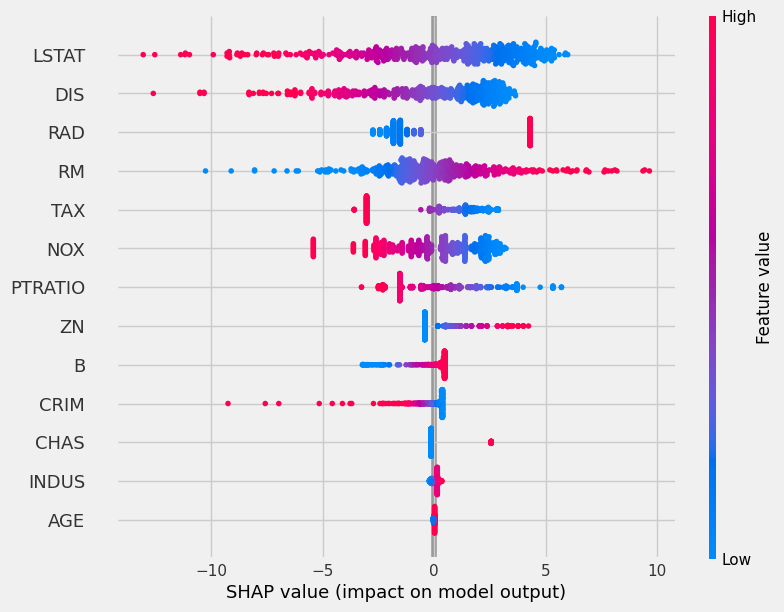

In [123]:
shap.plots.beeswarm(shap_values, max_display=14)

In [124]:
# Filter selected features
X_method5 = X[['LSTAT', 'DIS', 'RM', 'PTRATIO', 'CRIM']]

In [125]:
# fit/train model
pipe.fit(X_method5, y)

# predict labels

y_pred = pipe.predict(X_method5)

print(y_pred[:10])
print(f'R^2: {pipe.score(X_method5, y):0.4}')

[31.63761273 25.5236182  32.0243847  30.38600726 29.5358719  26.50795486
 23.71933951 19.96956586 10.8068779  20.1215183 ]
R^2: 0.6958


## Feature Scaling
Feature scaling is one of the most critical steps during the pre-processing of data before creating actual machine learning model. The idea of feature scaling is to make sure that features are on a similar scale. Scaling can make a big difference between a weak machine learning model and a better one. Further, scaling enables faster convergence or calculation of cost functions in gradient descent. The most common feature scaling techniques are Normalization and Standardization.

For list of transformers in Scikit-learn, refer transformers and to compare the effect of different scalers on data on outliers.

In [126]:
import numpy as np
from sklearn import preprocessing

##  MinMaxScaler

Scaling or rescaling is the most common preprocessing task in machine learning. The algorithms will assume all features are on the same scale, typically 0 to 1 or –1 to 1. MinMaxScaler is one of the simplest scaling method which is also commonly referred as normalization. Min-max scaling uses the minimum and maximum values of a feature to rescale values to within a range.

While there is no mathematical difference between the two options, sometimes we benefit from keeping these operations separate as it allows us to apply the same transformation to different sets of the data.

In [127]:
X = np.array([[-500.5], [-100.1], [0], [100.1], [900.9]])
X

array([[-500.5],
       [-100.1],
       [   0. ],
       [ 100.1],
       [ 900.9]])

In [128]:
# Create scaler
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0,1))

# Scale or Transform the feature
scaled_X = minmax_scale.fit_transform(X)

scaled_X

array([[0.        ],
       [0.28571429],
       [0.35714286],
       [0.42857143],
       [1.        ]])

## StandardScaler

Standardization is a the most common (default) scaling method for most machine learning preprocessing. The usage of this scaling method also depends on the learning algorithm. For example, principal component analysis often works better using standardization, while normalization is often preferred for neural networks. As a rule of thumb, always default to standardization unless you have a specific reason to adopt to other scaling methods.

Standardization is z-scoring of the features where we rescale the features to be approximately standard normally distributed. The data is transformed to have a mean, of 0 and a standard deviation, of 1.



In [129]:
# Create feature
X = np.array([[-1000.1], [-200.2], [500.5], [600.6], [9000.9],[10]])
X

array([[-1000.1],
       [ -200.2],
       [  500.5],
       [  600.6],
       [ 9000.9],
       [   10. ]])

In [130]:
# Create scaler
scaler = preprocessing.StandardScaler()

# Transform the feature
scaled_X = scaler.fit_transform(X)

scaled_X

array([[-0.73061913],
       [-0.49547543],
       [-0.28949319],
       [-0.26006715],
       [ 2.20933859],
       [-0.43368369]])

In [131]:
# Mean and Standard deviation of scaled feature
scaled_X. mean(), scaled_X.std()

(7.401486830834377e-17, 0.9999999999999998)

## RobustScaler

If the data has significant outliers, it can significantly impact our standardization by affecting the feature’s mean and variance. In such scenarios, we scale features using statistics that are robust to outliers. We do this by removing the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

In [132]:
# Create scaler
robust_scaler = preprocessing.RobustScaler()

# Transform feature
robust_scaler.fit_transform(X)

array([[-1.73576688],
       [-0.6297487 ],
       [ 0.33910609],
       [ 0.47751391],
       [12.09257147],
       [-0.33910609]])

## Normalizer

Normalizer rescale the feature values of observations to have unit norm (a total length of one). This is different from min-max scaler which is also commonly referred as normalization. The key difference is normalizer works on the rows, not the columns. Meaning, we rescale across individual observations.

By default, L2 normalization is applied to each observation so that the values in a row have a unit norm. Unit norm with L2 means that if each element were squared and summed, the total would be equal to one. Alternatively, L1 can be applied instead of L2 normalization.

In [133]:
# Create feature matrix
X = np.array([[0.5, 0.5], [1.1, 3.4], [1.5, 20.2], [1.63, 34.4], [10.9, 3.3]])
X

array([[ 0.5 ,  0.5 ],
       [ 1.1 ,  3.4 ],
       [ 1.5 , 20.2 ],
       [ 1.63, 34.4 ],
       [10.9 ,  3.3 ]])

In [134]:
# Transform feature with l1 norm
preprocessing.Normalizer(norm="l1").fit_transform(X)

array([[0.5       , 0.5       ],
       [0.24444444, 0.75555556],
       [0.06912442, 0.93087558],
       [0.04524008, 0.95475992],
       [0.76760563, 0.23239437]])

In [135]:
# Transform feature with l2 norm
preprocessing.Normalizer(norm="l2").fit_transform(X)

array([[0.70710678, 0.70710678],
       [0.30782029, 0.95144452],
       [0.07405353, 0.99725427],
       [0.04733062, 0.99887928],
       [0.95709822, 0.28976368]])

In [136]:
# Transform feature with max norm
preprocessing.Normalizer(norm="max").fit_transform(X)

array([[1.        , 1.        ],
       [0.32352941, 1.        ],
       [0.07425743, 1.        ],
       [0.04738372, 1.        ],
       [1.        , 0.30275229]])

## Predict Boston house via different estimator

In [137]:
# Distribution functions
from scipy.stats import norm

# tensorflow is preinstalled
# pip/conda install tensorflow

# Load libraries
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

#Libraries for Deep Learning Models
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.layers import LSTM
from keras.wrappers.scikit_learn import KerasRegressor

#Libraries for Statistical Models
import statsmodels.api as sm

#Libraries for Saving the Model
from pickle import dump
from pickle import load

# Time series Models
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Error Metrics
from sklearn.metrics import mean_squared_error

# Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression


#Plotting 
from pandas.plotting import scatter_matrix
from statsmodels.graphics.tsaplots import plot_acf

#Disable the warnings
import warnings
warnings.filterwarnings('ignore')

In [138]:
# Define feature and target
X = boston.drop('MEDV', axis=1)      # Feature
y = boston['MEDV']                   # Label

In [139]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [140]:
# Use SelectKBest function from sklearn 
# Univariate Feature Selection

bestfeatures = SelectKBest(k='all', score_func=f_regression)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(['CRIM	', 'CHAS', 'AGE'])

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores.nlargest(10,'Score').set_index('Specs')  #print 10 best features

,Score
Specs,
NaN,601.617871
NaN,471.846740
NaN,175.105543
AGE,153.954883
NaN,141.761357
NaN,112.591480
CRIM\t,89.486115
NaN,85.914278
NaN,83.477459


In [141]:
# Train Test Split and Evaluation Metrics

validation_size = 0.2

train_size = int(len(X) * (1-validation_size))
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = y[0:train_size], y[train_size:len(X)]

In [142]:
# The parameters for the K fold analysis
num_folds = 10
seed = 7
# scikit is moving away from mean_squared_error. 
# In order to avoid confusion, and to allow comparison with other models, we invert the final scores
scoring = 'neg_mean_squared_error'

In [143]:
# Linear Models and Regression Trees

models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

models.append(('MLP', MLPRegressor()))

# Boosting and Bagging Methods

# Boosting methods
models.append(('ABR', AdaBoostRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
# Bagging methods
models.append(('RFR', RandomForestRegressor()))
models.append(('ETR', ExtraTreesRegressor()))

In [144]:
names = []
kfold_results = []
test_results = []
train_results = []
for name, model in models:
    names.append(name)
    
    ## K Fold analysis:
    
    kfold = KFold(n_splits=num_folds, random_state=None)
    #converted mean square error to positive. The lower the beter
    cv_results = -1* cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    kfold_results.append(cv_results)
    

    # Full Training period
    res = model.fit(X_train, Y_train)
    train_result = mean_squared_error(res.predict(X_train), Y_train)
    train_results.append(train_result)
    
    # Test results
    test_result = mean_squared_error(res.predict(X_test), Y_test)
    test_results.append(test_result)
    
    msg = "%s: %f (%f) %f %f" % (name, cv_results.mean(), cv_results.std(), train_result, test_result)
    print(msg)

LR: 61.971800 (130.509766) 22.778380 32.799863
LASSO: 37.441606 (38.130363) 27.209157 19.113891
EN: 33.803062 (26.804633) 27.828261 19.353884
KNN: 90.350608 (46.522916) 29.562579 39.924690
CART: 38.341375 (46.296951) 0.000000 73.624118
SVR: 81.867204 (62.256452) 79.218556 27.817042
MLP: 48.290758 (32.612233) 38.352025 61.899250
ABR: 29.690701 (40.965779) 7.041059 20.579732
GBR: 23.734909 (38.501332) 1.640095 16.409812
RFR: 23.578068 (40.008244) 1.382017 17.204750
ETR: 23.653161 (38.239992) 0.000000 20.874032


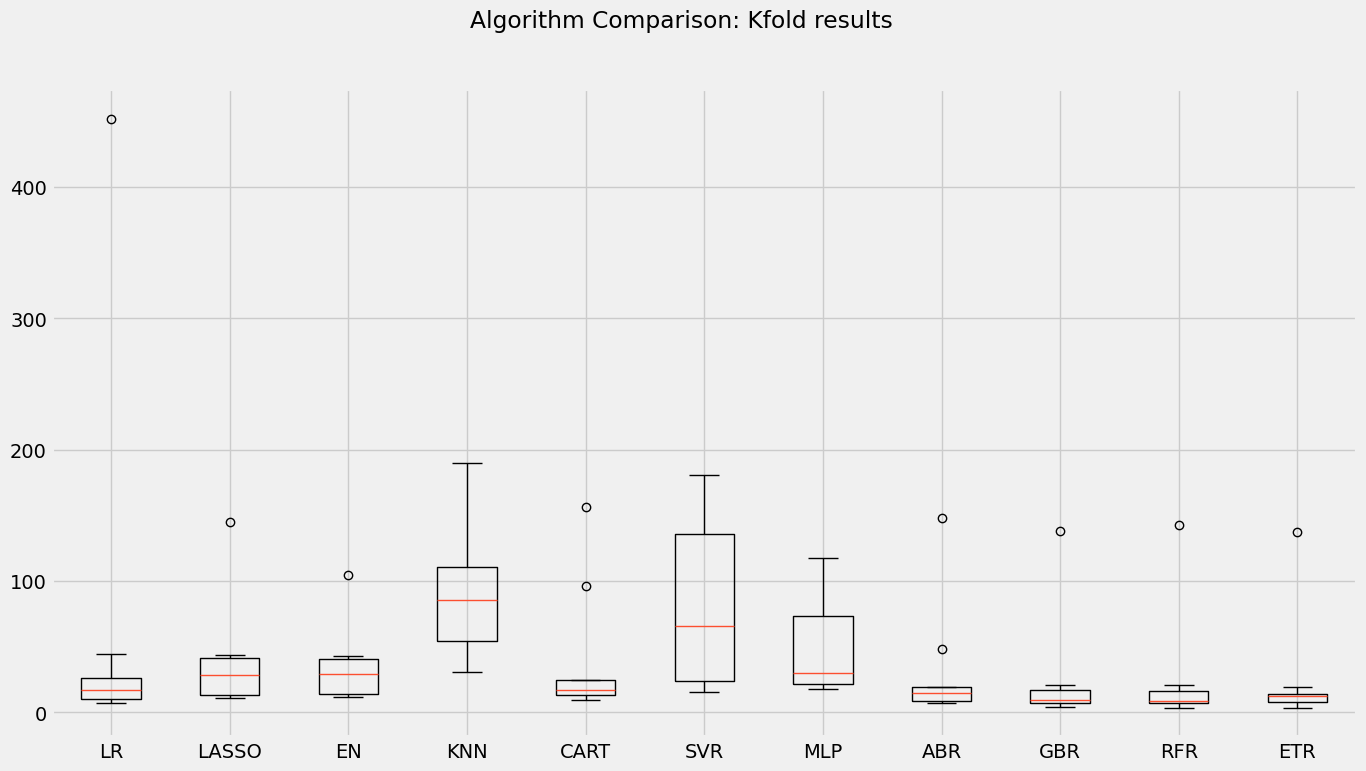

In [145]:
# Looking at the Kfold analysis

fig = pyplot.figure()
fig.suptitle('Algorithm Comparison: Kfold results')
ax = fig.add_subplot(111)
pyplot.boxplot(kfold_results)
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
pyplot.show()

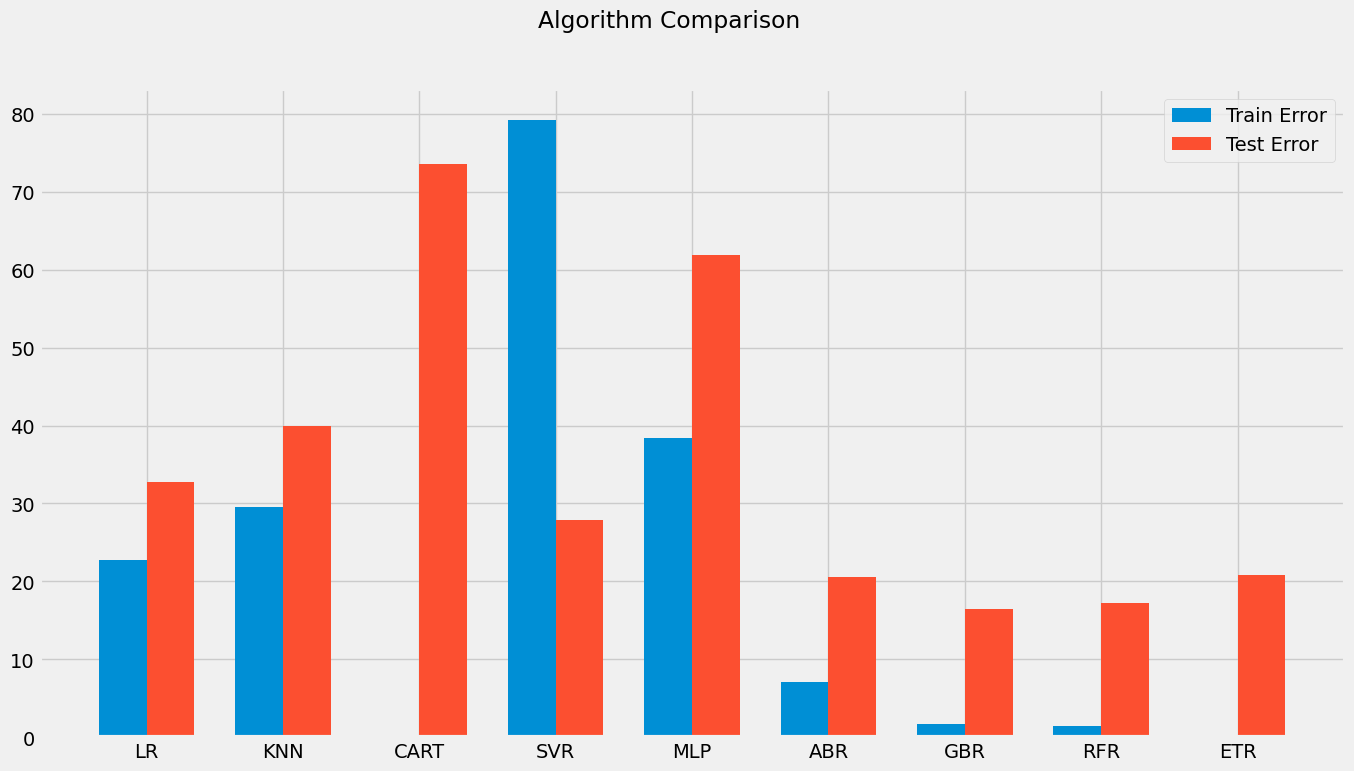

In [146]:
# In order to get a better view, we remove the LASSO and Elastic Net

# compare algorithms
fig = pyplot.figure()

ind = np.arange(len(names)-2)  # the x locations for the groups
width = 0.35  # the width of the bars

fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.bar(ind - width/2, train_results[0:1] + train_results[3:],  width=width, label='Train Error')
pyplot.bar(ind + width/2, test_results[0:1] + test_results[3:], width=width, label='Test Error')
fig.set_size_inches(15,8)
pyplot.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names[0:1] + names[3:])
pyplot.show()